In [ ]:
# # install octave
# !sudo apt-get -qq update
# !sudo apt-get -qq install octave octave-signal liboctave-dev

# # install oct2py that compatible with colab
# import os

# from pkg_resources import get_distribution

# os.system(
#     f"pip install -qq"
#     f" ipykernel=={get_distribution('ipykernel').version}"
#     f" ipython=={get_distribution('ipython').version}"
#     f" tornado=={get_distribution('tornado').version}"
#     f" oct2py"
# )

# # install packages
# !pip install -qq matpower matpowercaseframes

In [ ]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import oct2py

import matpower

print(f"oct2py version: {oct2py.__version__}")
print(f"matpower version: {matpower.__version__}")

oct2py version: 5.8.0
matpower version: 8.1.0.2.2.2


In [ ]:
from matpowercaseframes import CaseFrames

from matpower import start_instance

In [ ]:
m = start_instance()

In [ ]:
cf = CaseFrames("case9", load_case_engine=m)
display(cf.bus)
display(cf.branch)

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN
1,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
2,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
3,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
4,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
5,5.0,1.0,90.0,30.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
6,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
7,7.0,1.0,100.0,35.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
8,8.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9
9,9.0,1.0,125.0,50.0,0.0,0.0,1.0,1.0,0.0,345.0,1.0,1.1,0.9


,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,BR_STATUS,ANGMIN,ANGMAX
1,1.0,4.0,0.0000,0.0576,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
2,4.0,5.0,0.0170,0.0920,0.158,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
3,5.0,6.0,0.0390,0.1700,0.358,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0
4,3.0,6.0,0.0000,0.0586,0.000,300.0,300.0,300.0,0.0,0.0,1.0,-360.0,360.0
5,6.0,7.0,0.0119,0.1008,0.209,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0
6,7.0,8.0,0.0085,0.0720,0.149,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
7,8.0,2.0,0.0000,0.0625,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
8,8.0,9.0,0.0320,0.1610,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0
9,9.0,4.0,0.0100,0.0850,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0


In [ ]:
bus_i_target = 7  # bus that we want to plot
bus_i_target_idx = (cf.bus["BUS_I"] == bus_i_target).idxmax()
bus_i_target_idx_np = (cf.bus["BUS_I"] == bus_i_target).to_numpy().argmax()
bus_pd0 = cf.bus.loc[bus_i_target_idx, "PD"]
bus_qd0 = cf.bus.loc[bus_i_target_idx, "QD"]

s = 10
bus_pd_target = bus_pd0 * s
bus_qd_target = bus_qd0 * s
cf_ = copy.deepcopy(cf)
cf_.bus.loc[bus_i_target_idx, "QD"] = bus_qd_target
cf_.bus.loc[bus_i_target_idx, "PD"] = bus_pd_target

mpopt = m.mpoption("verbose", 2)
m.push("_mpopt", mpopt, verbose=False)
m.push("_mpc_base", cf.to_mpc(), verbose=False)
m.push("_mpc_target", cf_.to_mpc(), verbose=False)
m.eval("_r1 = runcpf(_mpc_base, _mpc_target, _mpopt);", verbose=True)


Converged in 0.11 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    319.6              22.8
Loads              3     Load                   315.0             115.0
  Fixed            3       Fixed                315.0             115.0
  Dispatchable     0       Dispatchable          -0.0 of -0.0      -0.0
Shunts             0     Shunt (inj)             -0.0               0.0
Branches           9     Losses (I^2 * Z)         4.64             48.38
Transformers       0     Branch Charging (inj)     -              140.5
Inter-ties         0     Total Inter-tie Flow     0.0               0.0
Areas 

In [ ]:
# pull all after cleansing unsupported data
m.eval(
    """
    _r1 = rmfield(_r1, 'task');
    _r1 = rmfield(_r1, 'om');
    """
)
mpc = m.pull("_r1")

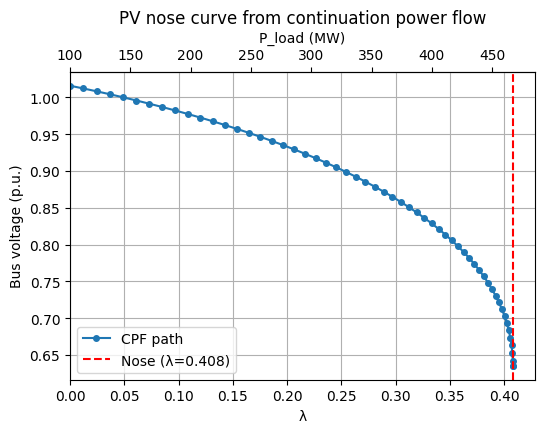

In [ ]:
lam = np.real(mpc["cpf"]["lam"]).flatten()
lam_max = mpc["cpf"]["max_lam"]
V = np.abs(mpc["cpf"]["V"][bus_i_target_idx_np, :])

P_base = bus_pd0
P_target = bus_pd_target

P_vals = P_base + lam * (P_target - P_base)
P_crit = P_base + lam_max * (P_target - P_base)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(lam, V, marker="o", markersize=4, label="CPF path")
ax.axvline(lam_max, color="r", linestyle="--", label=f"Nose (λ={lam_max:.3f})")
ax.set_xlabel("λ")
ax.set_ylabel("Bus voltage (p.u.)")
ax.grid(True)


def lam_to_P(x):
    return P_base + x * (P_target - P_base)


def P_to_lam(x):
    return (x - P_base) / (P_target - P_base)


ax_top = ax.secondary_xaxis("top", functions=(lam_to_P, P_to_lam))
ax_top.set_xlabel("P_load (MW)")

plt.xlim(0, None)
plt.xlabel("λ")
plt.ylabel("Bus voltage (p.u.)")
plt.title("PV nose curve from continuation power flow")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cf = CaseFrames(mpc)
display(cf.bus)
display(cf.branch)

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN
1,1.0,3.0,0.000000,0.000000,0.0,0.0,1.0,1.040000,0.000000,345.0,1.0,1.1,0.9
2,2.0,2.0,0.000000,0.000000,0.0,0.0,1.0,1.025000,-49.506473,345.0,1.0,1.1,0.9
3,3.0,2.0,0.000000,0.000000,0.0,0.0,1.0,1.025000,-53.727560,345.0,1.0,1.1,0.9
4,4.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.882415,-18.649520,345.0,1.0,1.1,0.9
5,5.0,1.0,90.000000,30.000000,0.0,0.0,1.0,0.808290,-36.017306,345.0,1.0,1.1,0.9
6,6.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.851693,-56.998467,345.0,1.0,1.1,0.9
7,7.0,1.0,467.236003,163.532601,0.0,0.0,1.0,0.635389,-77.663384,345.0,1.0,1.1,0.9
8,8.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.814509,-56.515446,345.0,1.0,1.1,0.9
9,9.0,1.0,125.000000,50.000000,0.0,0.0,1.0,0.786020,-36.774011,345.0,1.0,1.1,0.9


,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,BR_STATUS,ANGMIN,ANGMAX,PF,QF,PT,QT
1,1.0,4.0,0.0000,0.0576,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,509.486716,368.185869,-509.486716,-157.757589
2,4.0,5.0,0.0170,0.0920,0.158,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,242.799519,55.426280,-229.101079,7.393742
3,5.0,6.0,0.0390,0.1700,0.358,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,139.101079,-37.393742,-127.156588,64.780496
4,3.0,6.0,0.0000,0.0586,0.000,300.0,300.0,300.0,0.0,0.0,1.0,-360.0,360.0,85.000000,305.566435,-85.000000,-249.457770
5,6.0,7.0,0.0119,0.1008,0.209,150.0,150.0,150.0,0.0,0.0,1.0,-360.0,360.0,212.156588,184.677274,-198.708714,-82.564960
6,7.0,8.0,0.0085,0.0720,0.149,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-268.527289,-80.967641,284.988464,212.453249
7,8.0,2.0,0.0000,0.0625,0.000,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-163.000000,-264.332911,163.000000,355.188115
8,8.0,9.0,0.0320,0.1610,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-121.988464,51.879662,131.022277,-26.031443
9,9.0,4.0,0.0100,0.0850,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-256.022277,-23.968557,266.687197,102.331309
